# Stern and Gerlach simulation

It was discovered experimentally,[in 1922 by Stern and Gerlach](https://www.feynmanlectures.caltech.edu/II_35.html#Ch35-S2) (SG), that the spin of an electron along any direction is quantised, taking values of either $\hbar/2$ or $-\hbar/2$. 

Since then, people have described an idealised system of many SG systems in parallel that are capable of splitting apart and recombining the particle beams together (often called a Stern-Gerlach interferometer) to create interference effects that are commonly discussed in the two slit experiment (see e.g. the [Feynman lectures](https://www.feynmanlectures.caltech.edu/III_05.html#Ch5-S4)). 

To my surprise, it is only [very recently](https://arxiv.org/abs/1801.02708) that Stern-Gerlach interferometer experiments are being considered practical enough to implement and yet they are used frequently as a pedagogical example. It is therefore worth first developing an intuition for what one might expect from such SG interferometer experiments using only classical physics. That is the purpose of this notebook.




In [14]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)
import scipy.constants as const

In [15]:
const.find("dipole")

['atomic unit of electric dipole mom.', 'atomic unit of mag. dipole mom.']

In [16]:
mu_e

1.85480201566e-23

In [17]:
machine_dim_x = 1.0
machine_dim_y = 0.1
machine_dim_z = 0.1

Bmin = 1.0e-4
Bmax = 10.0e-4
deltaB = Bmax - Bmin
gradB0 = deltaB / machine_dim_z

e = const.e
m = const.m_e
gyro =  e/(2.0*m)
mu_e = const.physical_constants["atomic unit of mag. dipole mom."][0]

In [18]:
def B(r):
    B = np.zeros(3)
    B[2] = (Bmin + deltaB*r[2]/machine_dim_z)
    return B

In [19]:
def gradB(r):
    gradB = np.zeros((3,3))
    gradB[2,2] = gradB0
    return gradB

In [20]:
dt = 1.0e-10
t_max = 1.0e-5
times = np.arange(0,t_max,dt)

mu = np.array([0.0,1/np.sqrt(2),1/np.sqrt(2)])*mu_e
r = np.array([0,0.05,0.05])
v = np.array([600.0,0,0])
r_save = np.zeros((times.size,3))
mu_save = np.zeros((times.size,3))

In [21]:
for i,t in enumerate(times):
    v += 0.5*dt*np.matmul(mu,gradB(r))/m
    mu += dt*gyro*np.cross(mu,B(r))
    r += dt*v
    v += 0.5*dt*np.matmul(mu,gradB(r))/m
    
    r_save[i,:] = r
    mu_save[i,:] = mu

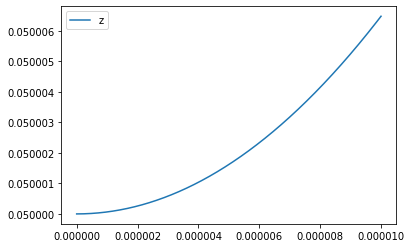

In [117]:
# plt.plot(times,r_save[:,0], label="x")
# plt.plot(times,r_save[:,1], label="y")
plt.plot(times,r_save[:,2], label="z")
plt.legend();

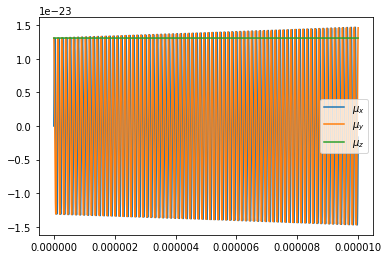

In [118]:
plt.plot(times,mu_save[:,0], label="$\mu_x$")
plt.plot(times,mu_save[:,1], label="$\mu_y$")
plt.plot(times,mu_save[:,2], label="$\mu_z$")
plt.legend(loc="right");

In [120]:
r[0]

0.006000006000082735

## Adding inhomogeneous field

In [293]:
s = 0.5*np.tanh(-10.0*(x-machine_dim_x))+0.5

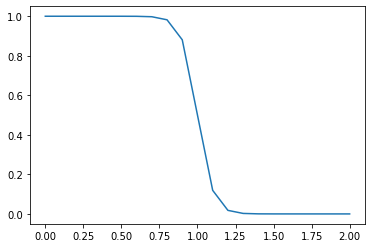

In [294]:
plt.plot(x,s)